### Edge flow denoising


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sclibrary import SCPlot, dataset_loader

sc, coordinates = dataset_loader.load_paper_data()

# create a plot
scplot = SCPlot(sc, coordinates)

In [3]:
from sclibrary.utils.eigendecomposition import get_eigendecomposition

L1 = sc.hodge_laplacian_matrix(rank=1).toarray()
u1, eigenvals = get_eigendecomposition(L1)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


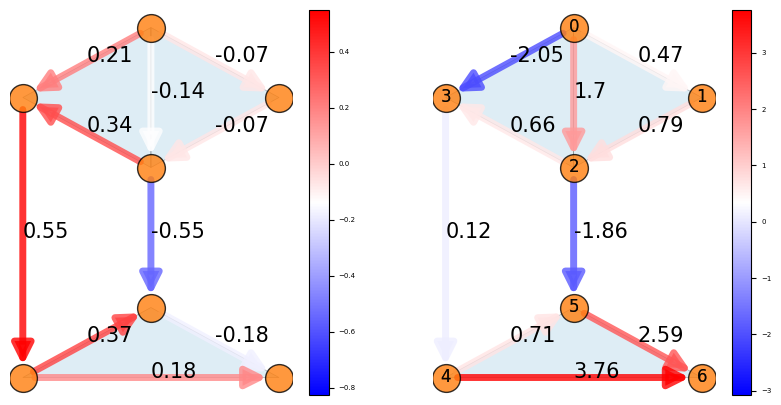

In [6]:

f0 = np.array([-0.0689, -0.1378, 0.2067, -0.0689, 0.3445, -0.5512, 0.5512, 0.3675, 0.1837, -0.1837])
f = np.array([0.4688, 1.6961, -2.0522, 0.7933, 0.6633, -1.8589, 0.1176, 0.7101, 3.7621, 2.5857])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
scplot.draw_network(edge_flow=np.round(f0, 2), ax=ax[0])
scplot.draw_network(edge_flow=np.round(f, 2), ax=ax[1])

mu: 0.01, error: 5.479191535699053
mu: 0.05, error: 4.855162361348163
mu: 0.1, error: 4.263315820955365
mu: 0.25, error: 3.149464391440803
mu: 0.5, error: 2.216255011763776
mu: 1, error: 1.4046125137410006
mu: 2.5, error: 0.6770858566332978
mu: 5, error: 0.3669886600120815
mu: 10, error: 0.1958343847921023
mu: 25, error: 0.09245610304002776
mu: 50, error: 0.06360391405855054
mu: 100, error: 0.053814910606831495


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


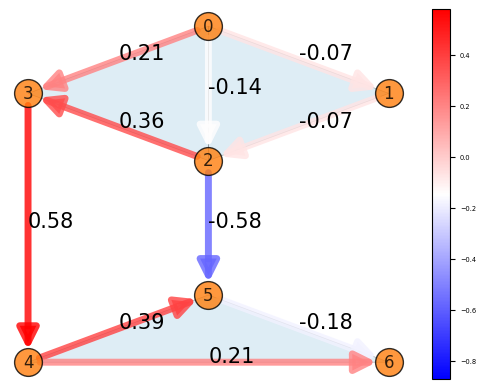

In [7]:
from sclibrary.filters import EdgeFlowDenoising


mu_vals = [1e-2, 5e-2, 1e-1, 2.5e-1, 5e-1, 1, 2.5, 5, 10, 25, 50, 100]

efd = EdgeFlowDenoising(sc)
efd.denoise(f=f, f_true=f0, mu_vals=mu_vals, p_choice="L1")

f_est_L1 = efd.history["f_estimated"]

scplot.draw_network(edge_flow=np.round(f_est_L1, 2))

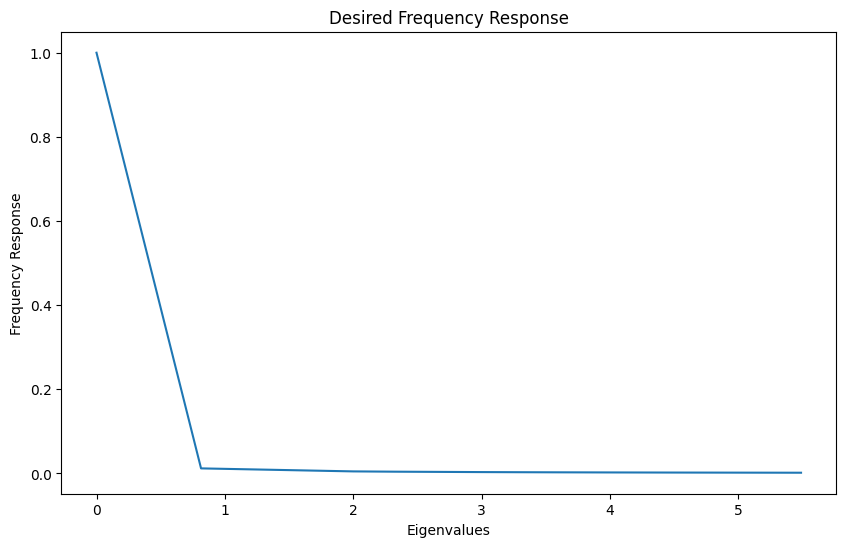

In [8]:
efd.plot_desired_frequency_response(p_choice="L1")